In [1]:
import os
import winsound

import librosa
import librosa.display
import IPython.display

import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline

In [2]:
def non_zero(data):
    idx = np.where(data != 0)[0]
    my_wants = idx[-1]
    return data[:(my_wants+1)]

In [4]:
def cut_file(filename, sr=44100):
    y, sr = librosa.load(filename, sr=sr, mono=True)
    y = non_zero(y)
    return y, sr

In [5]:
# os.listdir()

root = 'D:\GH\Audio\dataset\소리인식\분류완료'

for file in os.listdir(root):
    filepath = os.path.join(root, file)
    print(filepath)

D:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300
D:\GH\Audio\dataset\소리인식\분류완료\GE_B40 patient monitor
D:\GH\Audio\dataset\소리인식\분류완료\GE_transport patient monitor
D:\GH\Audio\dataset\소리인식\분류완료\PB980 ventilator
D:\GH\Audio\dataset\소리인식\분류완료\Terumo TE-171


In [19]:
test1 = 'D:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300\V300 high priority alarm 01.wav'
test2 = 'D:\GH\Audio\dataset\소리인식\분류완료\Terumo TE-171\occlusion alarm\TE171 occlusion alarm 01.wav'

target_length = 158760

y, sr = librosa.load(test1, sr=44100, mono=True)
print(y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

idx = np.where(y != 0)[0]
non_0_idx = idx[-1]
non_y = y[:(non_0_idx+1)]
print(non_y.shape)
print('Cutting Audio length (seconds): %.2f' % (len(non_y) / sr))

print(non_0_idx)
print('Cutting Audio length (seconds): %.2f' % (target_length / sr))

target_y = np.pad(non_y, (0,target_length-non_0_idx-1), 'constant', constant_values=0)
print(target_y.shape)
print(len(target_y))
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(target_y) / sr))

(189446,)
Sampling rate (Hz): 44100
Audio length (seconds): 4.30
(145346,)
Cutting Audio length (seconds): 3.30
145345
Cutting Audio length (seconds): 3.60
(158760,)
158760
Sampling rate (Hz): 44100
Audio length (seconds): 3.60


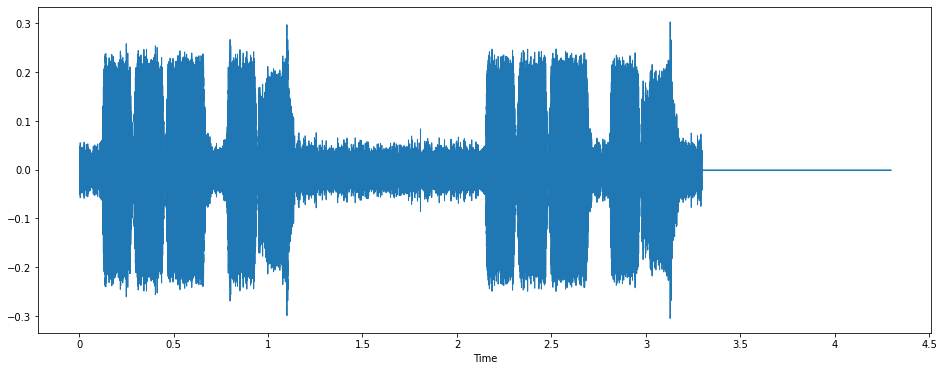

(189446,)
Sampling rate (Hz): 44100
Audio length (seconds): 4.30


In [20]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=y, sr=sr)
plt.show()
print(y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

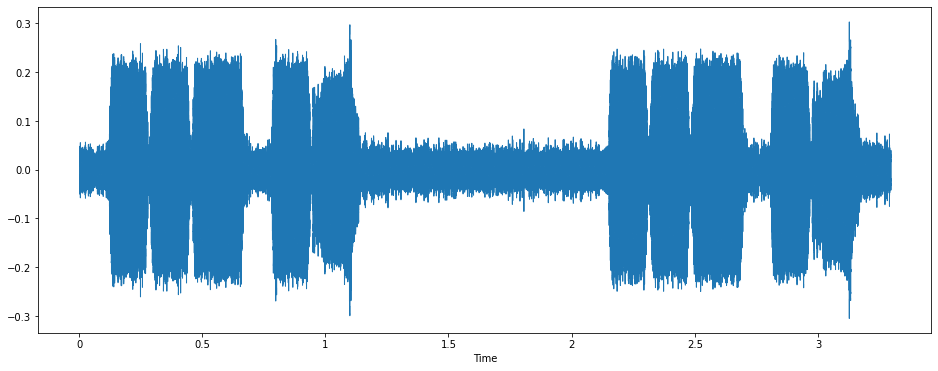

(145346,)
Sampling rate (Hz): 44100
Audio length (seconds): 3.30


In [21]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=non_y, sr=sr)
plt.show()
print(non_y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(non_y) / sr))

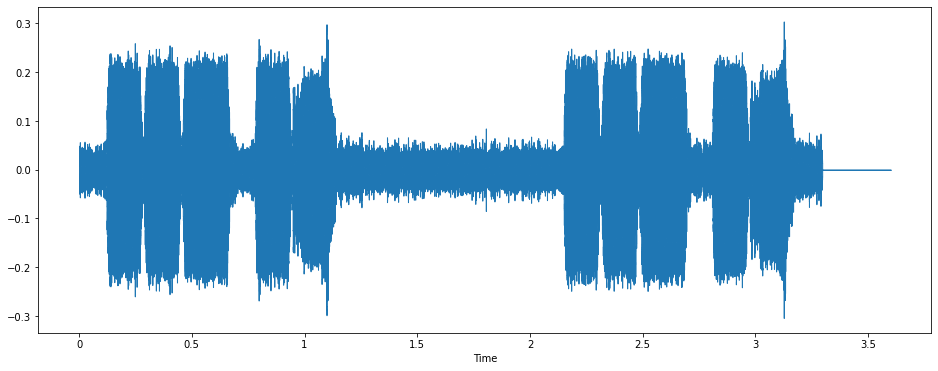

(158760,)
Sampling rate (Hz): 44100
Audio length (seconds): 3.60


In [22]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=target_y, sr=sr)
plt.show()
print(target_y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(target_y) / sr))

In [24]:
def zero_pad(file, target_length=158760, sr=44100):
    y, sr = librosa.load(file, sr=sr, mono=True)

    idx = np.where(y != 0)[0]
    non_0_idx = idx[-1]
    non_y = y[:(non_0_idx+1)]

    target_y = np.pad(non_y, (0,target_length-non_0_idx-1), 'constant', constant_values=0)
    return target_y

In [27]:
root = 'D:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300'
save_path = 'D:\GH\Audio\dataset\소리인식\dataset\zero_pad_3_6s'

target_length = 158760
sr = 44100

for idx, file in enumerate(os.listdir(root)):
    filepath = os.path.join(root, file)
    # print(filepath)    
    y = zero_pad(filepath, target_length=158760, sr=44100)
    if idx == 0:
        array = y
    else:
        array = np.vstack((array, y))
    
print(array.shape)
print('Audio length (seconds): %.2f' % (int(array.shape[1]) / sr))
np.save(os.path.join(save_path, 'Drager evita V300.npy'), array)


(70, 158760)
Audio length (seconds): 3.60


In [36]:
root = 'D:\GH\Audio\dataset\소리인식\분류완료'
save_path = 'D:\GH\Audio\dataset\소리인식\dataset\zero_pad'

target_length = 158760
sr = 44100
# array = np.empty(target_length)

for (root, dirs, files) in os.walk(root):
    idx = 0
    print("# root : " + root)
    if len(dirs) > 0:
        for dir_name in dirs:
            print("dir: " + dir_name)

    if len(files) > 0:
        for file_name in files:
            temp_title = file_name
            print("file: " + file_name)
            filepath = os.path.join(root, file_name)
            y = zero_pad(filepath, target_length=158760, sr=44100)
            if idx == 0:
                array = y
            else:
                array = np.vstack((array, y))
            idx += 1
        print(array.shape)
        print('Audio length (seconds): %.2f' % (int(array.shape[1]) / sr))
        np.save(os.path.join(save_path, temp_title[:-7]+'.npy'), array)

print("Pre Processing of data 3.6second with zero-padding DONE!")

# root : D:\GH\Audio\dataset\소리인식\분류완료
dir: Drager evita V300
dir: GE_B40 patient monitor
dir: GE_transport patient monitor
dir: PB980 ventilator
dir: Terumo TE-171
# root : D:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300
file: V300 high priority alarm 01.wav
file: V300 high priority alarm 02.wav
file: V300 high priority alarm 03.wav
file: V300 high priority alarm 04.wav
file: V300 high priority alarm 05.wav
file: V300 high priority alarm 06.wav
file: V300 high priority alarm 07.wav
file: V300 high priority alarm 08.wav
file: V300 high priority alarm 09.wav
file: V300 high priority alarm 10.wav
file: V300 high priority alarm 11.wav
file: V300 high priority alarm 12.wav
file: V300 high priority alarm 13.wav
file: V300 high priority alarm 14.wav
file: V300 high priority alarm 15.wav
file: V300 high priority alarm 16.wav
file: V300 high priority alarm 17.wav
file: V300 high priority alarm 18.wav
file: V300 high priority alarm 19.wav
file: V300 high priority alarm 20.wav
file: V300 high pr

In [46]:
test2 = 'D:\GH\Audio\dataset\소리인식\분류완료\Terumo TE-171\occlusion alarm\TE171 occlusion alarm 01.wav'

target_length = 158760

y, sr = librosa.load(test2, sr=44100, mono=True)
print(y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

idx = np.where(y != 0)[0]
non_0_idx = idx[-1]
non_y = y[:(non_0_idx+1)]
print(non_y.shape)
print('Cutting Audio length (seconds): %.2f' % (len(non_y) / sr))

print(non_0_idx)
print('Cutting Audio length (seconds): %.2f' % (target_length / sr))

# target_y = np.pad(non_y, (0,target_length-non_0_idx-1), 'constant', constant_values=0)
print('checking')
print(target_length//len(non_y))
print(target_length%len(non_y))
repeat = target_length//len(non_y)
remainder = target_length%len(non_y)

target_y = np.tile(non_y, repeat)
target_y = np.concatenate((target_y, non_y[:remainder]), axis = 0)
print(len(target_y))
print('Sampling rate (Hz): %d' % sr)
print('Target Audio length (seconds): %.2f' % (len(target_y) / sr))

(70733,)
Sampling rate (Hz): 44100
Audio length (seconds): 1.60
(26633,)
Cutting Audio length (seconds): 0.60
26632
Cutting Audio length (seconds): 3.60
checking
5
25595
158760
Sampling rate (Hz): 44100
Target Audio length (seconds): 3.60


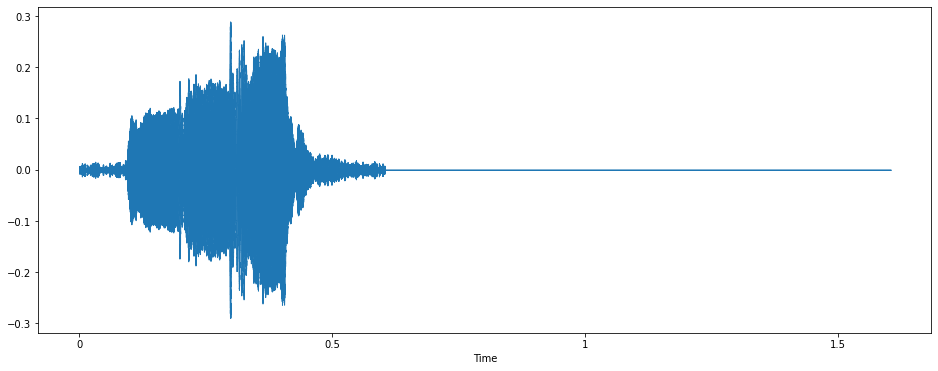

(70733,)
Sampling rate (Hz): 44100
Audio length (seconds): 1.60


In [47]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=y, sr=sr)
plt.show()
print(y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(y) / sr))

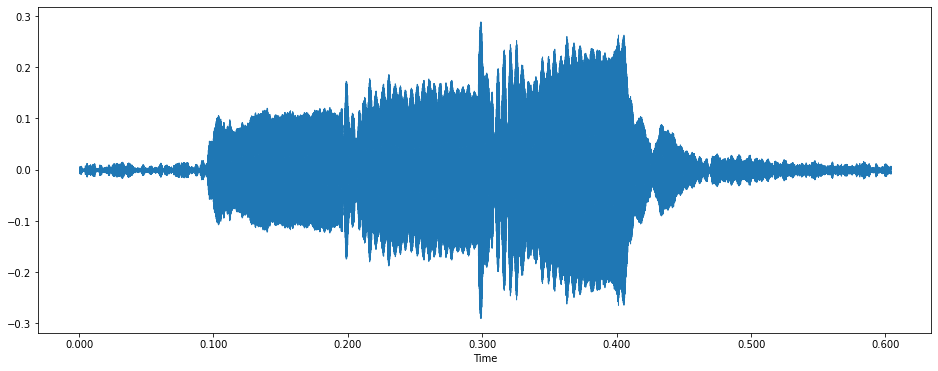

(26633,)
Sampling rate (Hz): 44100
Audio length (seconds): 0.60


In [48]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=non_y, sr=sr)
plt.show()
print(non_y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(non_y) / sr))

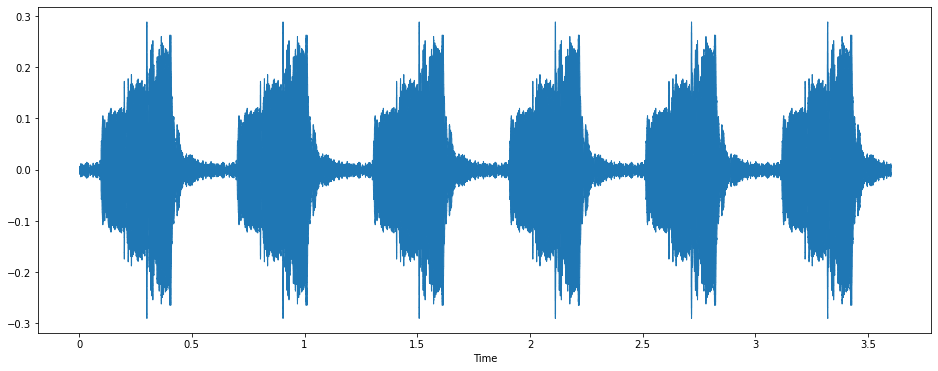

(158760,)
Sampling rate (Hz): 44100
Audio length (seconds): 3.60


In [49]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=target_y, sr=sr)
plt.show()
print(target_y.shape)
print('Sampling rate (Hz): %d' % sr)
print('Audio length (seconds): %.2f' % (len(target_y) / sr))

In [50]:
def repeat_pad(file, target_length=158760, sr=44100):
    y, sr = librosa.load(file, sr=sr, mono=True)

    idx = np.where(y != 0)[0]
    non_0_idx = idx[-1]
    non_y = y[:(non_0_idx+1)]

    repeat = target_length//len(non_y)
    remainder = target_length%len(non_y)

    target_y = np.tile(non_y, repeat)
    target_y = np.concatenate((target_y, non_y[:remainder]), axis = 0)
    return target_y

In [51]:
root = 'D:\GH\Audio\dataset\소리인식\분류완료'
save_path = 'D:\GH\Audio\dataset\소리인식\dataset\\repeat_pad'

target_length = 158760
sr = 44100
# array = np.empty(target_length)

for (root, dirs, files) in os.walk(root):
    idx = 0
    print("# root : " + root)
    if len(dirs) > 0:
        for dir_name in dirs:
            print("dir: " + dir_name)

    if len(files) > 0:
        for file_name in files:
            temp_title = file_name
            print("file: " + file_name)
            filepath = os.path.join(root, file_name)
            y = repeat_pad(filepath, target_length=158760, sr=44100)
            if idx == 0:
                array = y
            else:
                array = np.vstack((array, y))
            idx += 1
        print(array.shape)
        print('Audio length (seconds): %.2f' % (int(array.shape[1]) / sr))
        np.save(os.path.join(save_path, temp_title[:-7]+'.npy'), array)

print("Pre Processing of data 3.6second with repeat-padding DONE!")

# root : D:\GH\Audio\dataset\소리인식\분류완료
dir: Drager evita V300
dir: GE_B40 patient monitor
dir: GE_transport patient monitor
dir: PB980 ventilator
dir: Terumo TE-171
# root : D:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300
file: V300 high priority alarm 01.wav
file: V300 high priority alarm 02.wav
file: V300 high priority alarm 03.wav
file: V300 high priority alarm 04.wav
file: V300 high priority alarm 05.wav
file: V300 high priority alarm 06.wav
file: V300 high priority alarm 07.wav
file: V300 high priority alarm 08.wav
file: V300 high priority alarm 09.wav
file: V300 high priority alarm 10.wav
file: V300 high priority alarm 11.wav
file: V300 high priority alarm 12.wav
file: V300 high priority alarm 13.wav
file: V300 high priority alarm 14.wav
file: V300 high priority alarm 15.wav
file: V300 high priority alarm 16.wav
file: V300 high priority alarm 17.wav
file: V300 high priority alarm 18.wav
file: V300 high priority alarm 19.wav
file: V300 high priority alarm 20.wav
file: V300 high pr